In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("../../datasets/Telco_Customer_Churn.csv")

In [3]:
df.sample(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
5994,9661-ACXBS,Female,0,No,No,42,Yes,Yes,Fiber optic,Yes,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,105.20,4400.75,Yes
536,0621-HJWXJ,Female,0,Yes,No,63,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),81.55,5029.05,No
6418,2486-WYVVE,Male,0,Yes,No,31,Yes,Yes,DSL,No,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,79.30,2484,No
2196,6131-IUNXN,Female,0,Yes,Yes,19,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,20.20,382.2,No
3278,4293-ETKAP,Female,0,Yes,Yes,65,Yes,Yes,DSL,No,...,No,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),79.40,5071.9,No


## Data Exploration

In [4]:
df.drop(['customerID'], axis='columns', inplace=True)

In [5]:
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [6]:
# as we can see that we are having MonthlyChargers as float and TotalCharges as object, whereas both of them should have
# same datatype. Therefore we will convert the TotalCharges into numbers


df.TotalCharges.values

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

In [7]:
# pd.to_numeric(df.TotalCharges)

In [8]:
# so we got some errors bcz, there are are spaces in btw the numbers

pd.to_numeric(df.TotalCharges, errors='coerce') #cvt to numeric by ignoring the error (i.e spaces) by putting it a null val in that place

0         29.85
1       1889.50
2        108.15
3       1840.75
4        151.65
         ...   
7038    1990.50
7039    7362.90
7040     346.45
7041     306.60
7042    6844.50
Name: TotalCharges, Length: 7043, dtype: float64

In [9]:
# getting all the null values

t_null = pd.to_numeric(df.TotalCharges, errors='coerce').isnull()
t_null

0       False
1       False
2       False
3       False
4       False
        ...  
7038    False
7039    False
7040    False
7041    False
7042    False
Name: TotalCharges, Length: 7043, dtype: bool

In [10]:
df[t_null]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [11]:
df.shape

(7043, 20)

In [12]:
df[t_null].shape

(11, 20)

In [13]:
#so we will remove this columns

n_df = df[df.TotalCharges != " "]
n_df.shape

(7032, 20)

In [14]:
n_df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [15]:
cp_df = df.copy()
cp_df['TotalCharges'] = pd.to_numeric(n_df.TotalCharges)

In [16]:
cp_df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

## Data visualization

In [17]:
#lets get the people who are not using the service

t_churn_no = cp_df[cp_df.Churn == 'No'].tenure
t_churn_ys = cp_df[cp_df.Churn == 'Yes'].tenure

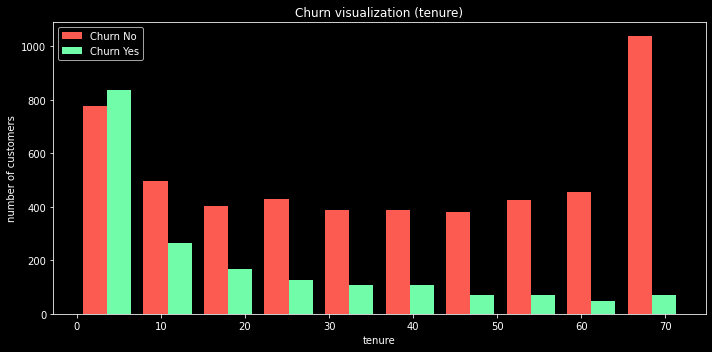

In [18]:
plt.style.use(['dark_background'])
plt.figure(figsize=(10, 5))

plt.title("Churn visualization (tenure)")
plt.ylabel('number of customers')
plt.xlabel('tenure')
plt.hist([t_churn_no, t_churn_ys], label=["Churn No", 'Churn Yes'], color=['#FC5B52', "#71FCAA"])
plt.tight_layout()
plt.legend()

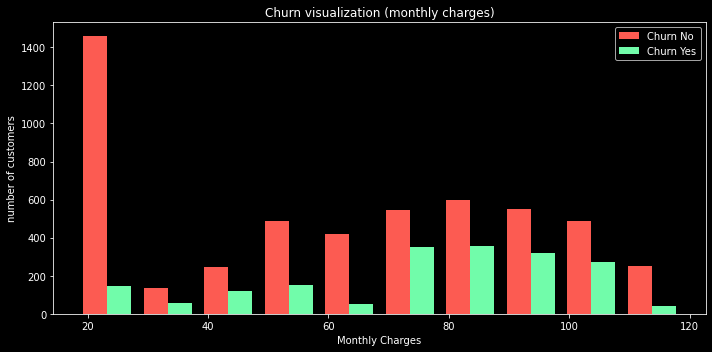

In [19]:
m_churn_no = cp_df[cp_df.Churn == 'No'].MonthlyCharges
m_churn_ys = cp_df[cp_df.Churn == 'Yes'].MonthlyCharges

plt.figure(figsize=(10, 5))

plt.title("Churn visualization (monthly charges)")
plt.ylabel('number of customers')
plt.xlabel('Monthly Charges')
plt.hist([m_churn_no, m_churn_ys], label=["Churn No", 'Churn Yes'], color=['#FC5B52', "#71FCAA"])
plt.tight_layout()
plt.legend()

## Data Cleanning

In [20]:
# get the catagorial values
def get_obj_df():
    for col in cp_df:
        if cp_df[col].dtype == 'object':
            print(f'{col} : {cp_df[col].unique()}')

In [21]:
get_obj_df()

gender : ['Female' 'Male']
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
PhoneService : ['No' 'Yes']
MultipleLines : ['No phone service' 'No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes' 'No internet service']
OnlineBackup : ['Yes' 'No' 'No internet service']
DeviceProtection : ['No' 'Yes' 'No internet service']
TechSupport : ['No' 'Yes' 'No internet service']
StreamingTV : ['No' 'Yes' 'No internet service']
StreamingMovies : ['No' 'Yes' 'No internet service']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn : ['No' 'Yes']


In [22]:
cp_df.replace('No internet service', 'No', inplace=True)
cp_df.replace('No phone service', 'No', inplace=True)

In [23]:
get_obj_df()

gender : ['Female' 'Male']
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
PhoneService : ['No' 'Yes']
MultipleLines : ['No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes']
OnlineBackup : ['Yes' 'No']
DeviceProtection : ['No' 'Yes']
TechSupport : ['No' 'Yes']
StreamingTV : ['No' 'Yes']
StreamingMovies : ['No' 'Yes']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn : ['No' 'Yes']


In [24]:
yn_col = ['Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', \
          'StreamingTV', 'StreamingMovies', 'PaperlessBilling', 'Churn']

len(yn_col)

12

In [25]:
for c in yn_col:
    cp_df[c].replace({'Yes' : 1, 'No' : 0}, inplace=True)

In [26]:
cp_df.sample(5)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
743,Female,0,1,1,61,1,1,No,0,0,0,0,0,0,Two year,1,Mailed check,24.10,1551.60,0
1742,Female,0,0,0,2,1,0,Fiber optic,0,1,0,0,1,0,Month-to-month,1,Bank transfer (automatic),87.15,183.75,1
6051,Male,0,0,0,16,1,0,No,0,0,0,0,0,0,Month-to-month,0,Mailed check,20.00,275.70,0
277,Male,1,1,0,21,1,0,DSL,1,1,0,0,0,1,Month-to-month,1,Bank transfer (automatic),64.95,1339.80,0
6345,Female,1,0,0,2,1,1,DSL,0,1,0,0,0,0,Month-to-month,1,Credit card (automatic),56.55,118.25,0


In [27]:
#remaing cols
get_obj_df()

gender : ['Female' 'Male']
InternetService : ['DSL' 'Fiber optic' 'No']
Contract : ['Month-to-month' 'One year' 'Two year']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']


In [28]:
cp_df['gender'].replace({'Female':0, 'Male': 1}, inplace=True)

In [29]:
#applying one hot encoding in the rest of the columns
cp_df = pd.get_dummies(data=cp_df, columns=['InternetService', 'Contract', 'PaymentMethod'])

In [30]:
cp_df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', 'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

In [31]:
cp_df.sample(5)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
3476,1,1,1,0,65,1,1,1,0,0,...,0,1,0,0,1,0,0,0,1,0
2178,1,0,1,0,53,1,0,0,0,0,...,0,0,1,0,0,1,0,1,0,0
4914,0,0,1,1,72,1,1,1,1,0,...,1,0,0,0,0,1,0,0,0,1
552,1,0,1,1,55,1,0,0,0,0,...,0,0,1,0,0,1,1,0,0,0
4309,0,0,0,0,22,0,0,0,0,1,...,1,0,0,1,0,0,0,0,1,0


In [32]:
cp_df.dtypes

gender                                       int64
SeniorCitizen                                int64
Partner                                      int64
Dependents                                   int64
tenure                                       int64
PhoneService                                 int64
MultipleLines                                int64
OnlineSecurity                               int64
OnlineBackup                                 int64
DeviceProtection                             int64
TechSupport                                  int64
StreamingTV                                  int64
StreamingMovies                              int64
PaperlessBilling                             int64
MonthlyCharges                             float64
TotalCharges                               float64
Churn                                        int64
InternetService_DSL                          uint8
InternetService_Fiber optic                  uint8
InternetService_No             

In [33]:
cp_df=cp_df.dropna()

## Preprocessing

In [34]:
col_to_scale = ['tenure', 'MonthlyCharges', 'TotalCharges']

from sklearn.preprocessing import MinMaxScaler

scale = MinMaxScaler()
cp_df[col_to_scale] = scale.fit_transform(cp_df[col_to_scale])

In [35]:
X = cp_df.drop('Churn', axis=1)
y = cp_df['Churn']

## Train, test split

In [36]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [37]:
X_train.shape

(5625, 26)

## Build the Model

In [38]:
import tensorflow as tf
from tensorflow import keras


model = keras.Sequential([
    keras.layers.Dense(26, input_shape=(26,), activation='relu'),
    keras.layers.Dense(15, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

# opt = keras.optimizers.Adam(learning_rate=0.01)

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [39]:
model.fit(X_train, y_train, epochs=100)

Epoch 1/100
176/176 [==============================] - 1s 1ms/step - loss: 0.5133 - accuracy: 0.7360
Epoch 2/100
176/176 [==============================] - 0s 1ms/step - loss: 0.4280 - accuracy: 0.7972
Epoch 3/100
176/176 [==============================] - 0s 1ms/step - loss: 0.4210 - accuracy: 0.8036
Epoch 4/100
176/176 [==============================] - 0s 1ms/step - loss: 0.4173 - accuracy: 0.8012
Epoch 5/100
176/176 [==============================] - 0s 1ms/step - loss: 0.4142 - accuracy: 0.8055
Epoch 6/100
176/176 [==============================] - 0s 1ms/step - loss: 0.4117 - accuracy: 0.8068
Epoch 7/100
176/176 [==============================] - 0s 1ms/step - loss: 0.4089 - accuracy: 0.8066
Epoch 8/100
176/176 [==============================] - 0s 1ms/step - loss: 0.4071 - accuracy: 0.8085
Epoch 9/100
176/176 [==============================] - 0s 1ms/step - loss: 0.4061 - accuracy: 0.8100
Epoch 10/100
176/176 [==============================] - 0s 1ms/step - loss: 0.4041 - accura

## Evaluation

In [40]:
model.evaluate(X_test, y_test)

44/44 [==============================] - 0s 2ms/step - loss: 0.4911 - accuracy: 0.7733


[0.49113428592681885, 0.7732764482498169]

In [41]:
pred = model.predict(X_test)

44/44 [==============================] - 0s 1ms/step


In [42]:
pred[:5]

array([[0.00188846],
       [0.07386457],
       [0.7776284 ],
       [0.05320434],
       [0.25407615]], dtype=float32)

In [43]:
y_test[:5]

2481    0
6784    0
6125    1
3052    0
4099    0
Name: Churn, dtype: int64

In [44]:
y_pred = []
for y_p in pred:
    if y_p >= 0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)

In [45]:
from sklearn.metrics import classification_report, confusion_matrix

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.89      0.85      1033
           1       0.59      0.46      0.52       374

    accuracy                           0.77      1407
   macro avg       0.71      0.67      0.69      1407
weighted avg       0.76      0.77      0.76      1407



Text(69.0, 0.5, 'Truth')

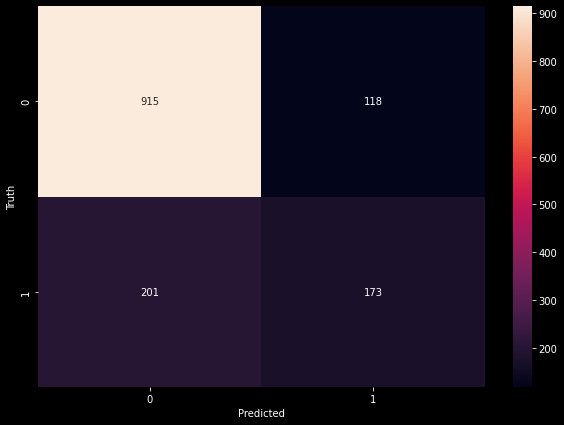

In [46]:
import seaborn as sn
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_pred)

plt.figure(figsize = (10,7))

# colormap = sn.color_palette([ "#080808", "#151116", "#4b444d", "#bc51ff", "#9d00ff", "#d797ff"])
sn.heatmap(cm,annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [51]:
## Accuracy = (correct_pred) / (total_pred)
# so from the above conf. mat we can get

corr_pred = (915+173)
total_pred = (915+118+201+173)

Accuracy = corr_pred/total_pred
print(f"Accuracy: {round(Accuracy, 2)}")

Accuracy: 0.77


In [67]:
## prec = TT/(TT+TF)
## Presicion of class 0, i.e. percision of customer who didnt churned

percsion_0 = 915/(915+201)
print(f"Precison for class_0: {round(percsion_0, 2)}")

Precison for class_0: 0.82


In [68]:
percsion_1 = 173/(118+173)
print(f"Precison for class_1: {round(percsion_1, 2)}")

Precison for class_1: 0.59


In [69]:
## recal_0

recal_0 = 915/(915+118)
print(f"Recal for class_0: {round(recal_0, 2)}")

Recal for class_0: 0.89


In [70]:
## recal_1

recal_1 = 173/(201+173)
print(f"Recal for class_1: {round(recal_1, 2)}")

Recal for class_1: 0.46
